# STEP 1

Import the dataset and the necessary libraries, check datatype, statistical summary,
shape, null values etc.


In [1]:
#Import the dataset and the necessary libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

car_data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
#load data
car_data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
#Data Types
car_data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [5]:
#Shape
car_data.mean().shape

(8,)

In [6]:
#NULL Values
car_data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [7]:
#Statistical Summary
car_data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


# STEP 2

Are there any columns in the dataset which you think are of less relevance. If so, give
your reasoning and drop them.

In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
#Since "Market Category","Engine Fuel Type" & "Number of Doors" are of less relevance, it would be good if we delete it.

car_data = car_data.drop(['Engine Fuel Type', 'Number of Doors','Market Category'], axis=1)
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Driven_Wheels      11914 non-null  object 
 7   Vehicle Size       11914 non-null  object 
 8   Vehicle Style      11914 non-null  object 
 9   highway MPG        11914 non-null  int64  
 10  city mpg           11914 non-null  int64  
 11  Popularity         11914 non-null  int64  
 12  MSRP               11914 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


# STEP 3

Rename the columns "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission
Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city
mpg": "MPG-C", "MSRP": "Price"


In [10]:
#Rename the column as per mentioned
car_data=car_data.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})

car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           11914 non-null  object 
 1   Model          11914 non-null  object 
 2   Year           11914 non-null  int64  
 3   HP             11845 non-null  float64
 4   Cylinders      11884 non-null  float64
 5   Transmission   11914 non-null  object 
 6   Drive Mode     11914 non-null  object 
 7   Vehicle Size   11914 non-null  object 
 8   Vehicle Style  11914 non-null  object 
 9   MPG-H          11914 non-null  int64  
 10  MPG-C          11914 non-null  int64  
 11  Popularity     11914 non-null  int64  
 12  Price          11914 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.2+ MB


# STEP 4

Check for any duplicates in the data, check for null values and missing data and remove
them.


In [11]:
car_data.shape

(11914, 13)

In [12]:
#number duplicate rows

duplicateRows_car_data = car_data[car_data.duplicated()] 
duplicateRows_car_data.shape

(792, 13)

In [13]:
#Drop the duplicate rows

car_data = car_data.drop_duplicates()

In [14]:
car_data.shape

(11122, 13)

In [15]:
#detecting the no. of missing values

car_data.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64

In [16]:
# Dropping the missing values.

car_data = car_data.dropna()
car_data.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [17]:
car_data.isnull().sum()

#Missing values removed successfully

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64

# STEP 5

Plot graphs of various columns to check for outliers and remove those data points from the
dataset.

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Often outliers can be seen with visualizations using a box plot.

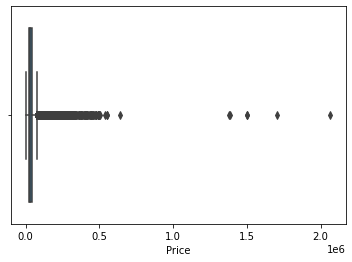

In [18]:
sns.boxplot(x=car_data['Price'])

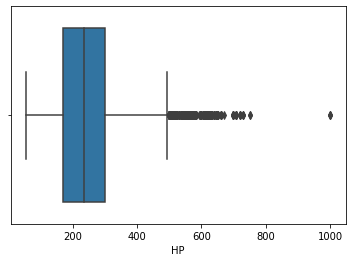

In [19]:
sns.boxplot(x=car_data['HP'])

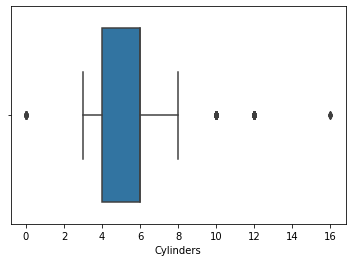

In [20]:
sns.boxplot(x=car_data['Cylinders'])

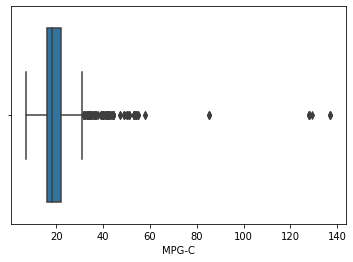

In [21]:
sns.boxplot(x=car_data['MPG-C'])

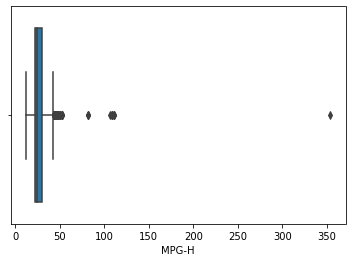

In [22]:
sns.boxplot(x=car_data['MPG-H'])

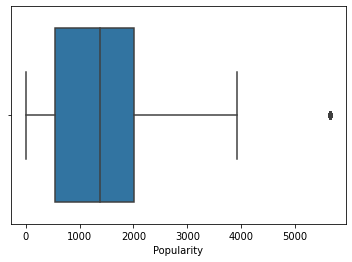

In [23]:
sns.boxplot(x=car_data['Popularity'])

In [24]:
#Finding Inter Quartile Range

Q1 = car_data.quantile(0.25)
Q3 = car_data.quantile(0.75)
iqr = Q3 - Q1
print(iqr)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [25]:
#Removing Outliers

car_data = car_data[~((car_data < (Q1 - 1.5 * iqr)) |(car_data > (Q3 + 1.5 * iqr))).any(axis=1)]
car_data.shape

(8546, 13)

# STEP 6

What car brands are the most represented in the dataset and find the average price among
the top car brands?

In [26]:
# Percentage of car per brand
counts = car_data['Make'].value_counts()*100/sum(car_data['Make'].value_counts())

In [27]:
#Top 10 popular brands
popular_cars=counts.index[:10]

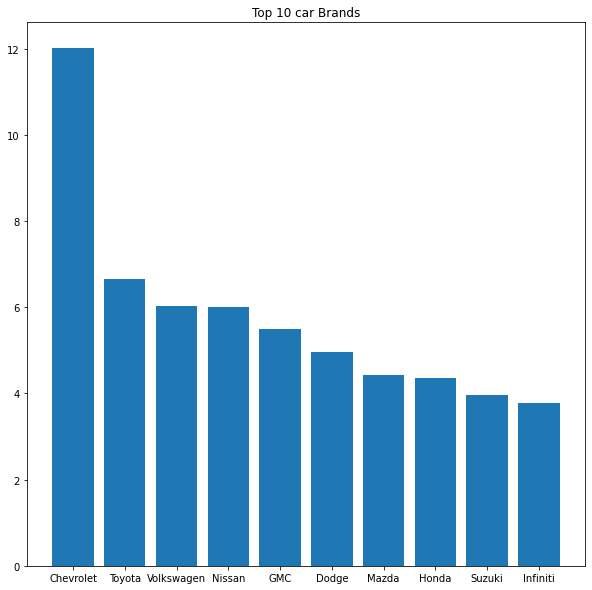

In [28]:
#Plotting the bar plot
plt.figure(figsize=(10,10))
plt.bar(popular_cars,height=counts[:10])
plt.title('Top 10 car Brands')
plt.show()

In [29]:
Prices=car_data[['Make','Price']].loc[(car_data['Make']=='Chevrolet')|
                                     (car_data['Make']=='Volkswagen')|
                                     (car_data['Make']=='Toyota')|
                                     (car_data['Make']=='Nissan')|
                                     (car_data['Make']=='GMC')|
                                     (car_data['Make']=='Dodge')|
                                     (car_data['Make']=='Mazda')|
                                     (car_data['Make']=='Honda')|
                                     (car_data['Make']=='Suzuki')|
                                     (car_data['Make']=='Infiniti')].groupby('Make').mean()
Prices

,Price
Make,
Chevrolet,28142.855891
Dodge,26076.722353
GMC,33261.400853
Honda,27381.364611
Infiniti,43127.822981
Mazda,20495.820106
Nissan,28352.543860
Suzuki,18168.241888
Toyota,27769.421793


# STEP 7

Plot the correlation matrix and document your insights.

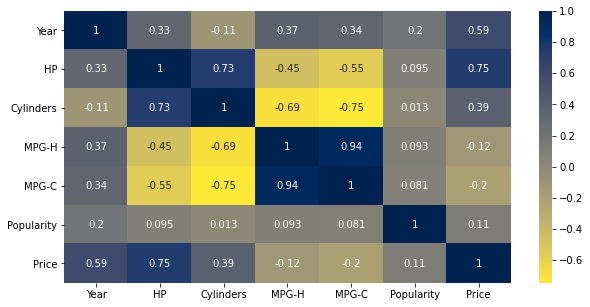

In [30]:
#Correlation Matrix

plt.figure(figsize=(10,5))
corrM=car_data.corr()
sns.heatmap(corrM,cmap="cividis_r",annot=True)

**From the heatmap plotted above, it can be concluded that:**

1. Price is positively dependent on features and Horse Power(HP) and Year

2. The features HP and Cylinders are positively dependent on each other

*i.e. if number of Cylinders are increased, the HP also increases*

3. MPG-H and MPG-C have strong negative correlation with Cylinders.

*i.e. if number of cylinders are increased, MPG-H and MPG-C decreases*

# STEP 8

Perform EDA and plot different graphs and document your findings (Try to see how other
variables affect the price of the car)

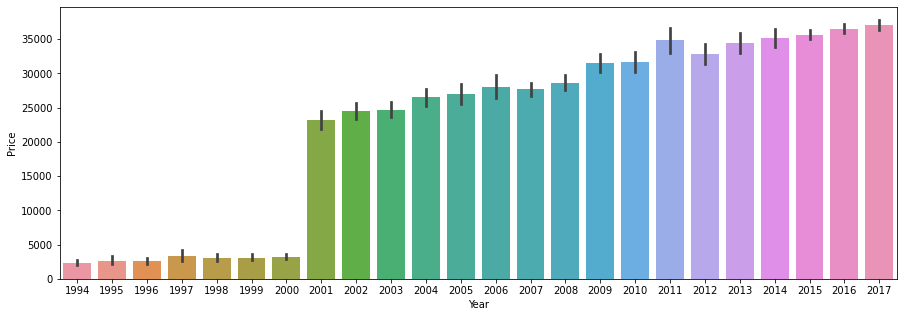

In [31]:
plt.figure(figsize=(15,5))
sns.barplot(car_data['Year'],car_data['Price'])

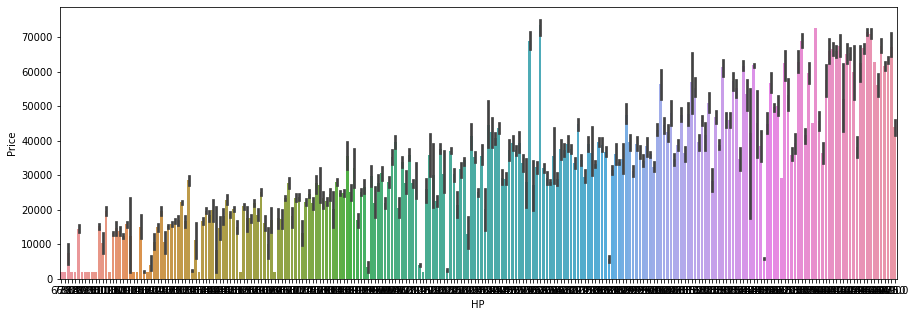

In [32]:
plt.figure(figsize=(15,5))
sns.barplot(car_data['HP'],car_data['Price'])

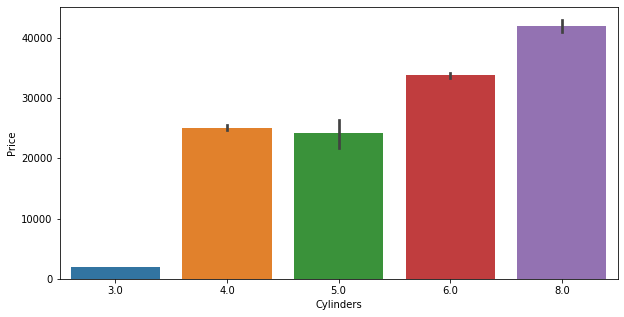

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(car_data['Cylinders'],car_data['Price'])

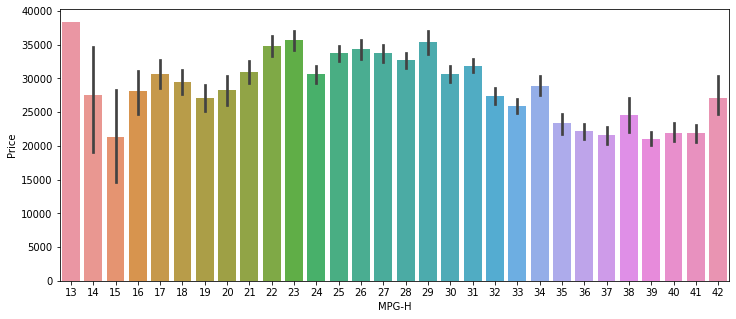

In [34]:
plt.figure(figsize=(12,5))
sns.barplot(car_data['MPG-H'],car_data['Price'])

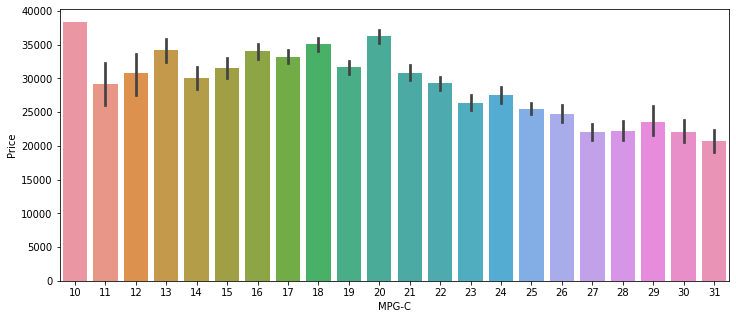

In [35]:
plt.figure(figsize=(12,5))
sns.barplot(car_data['MPG-C'],car_data['Price'])

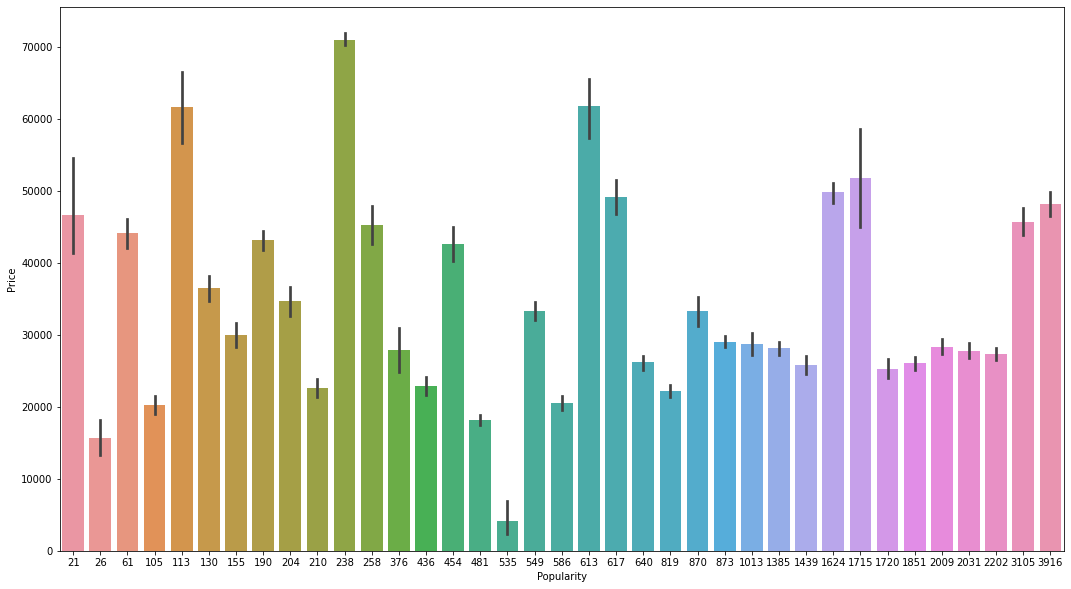

In [36]:
plt.figure(figsize=(18,10))
sns.barplot(car_data['Popularity'],car_data['Price'])

**After plotting graph between Price and other Parameters we conclude that :-**

1.   As Year increase Price also increase 
2.   As value of HP insrease Price will also increase
1.   Price will decrease with the value of MPG-H and MPG-C
2.   Popularity is not effecting the Price





# STEP 9

Split the dataset into 80 and 20 ratio and build a machine learning model with
Price as the target variable

In [37]:
X = car_data[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
Y = car_data['Price'].values

In [38]:
# Splitting the dataset into the Training and Testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [39]:
# Fitting Multiple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

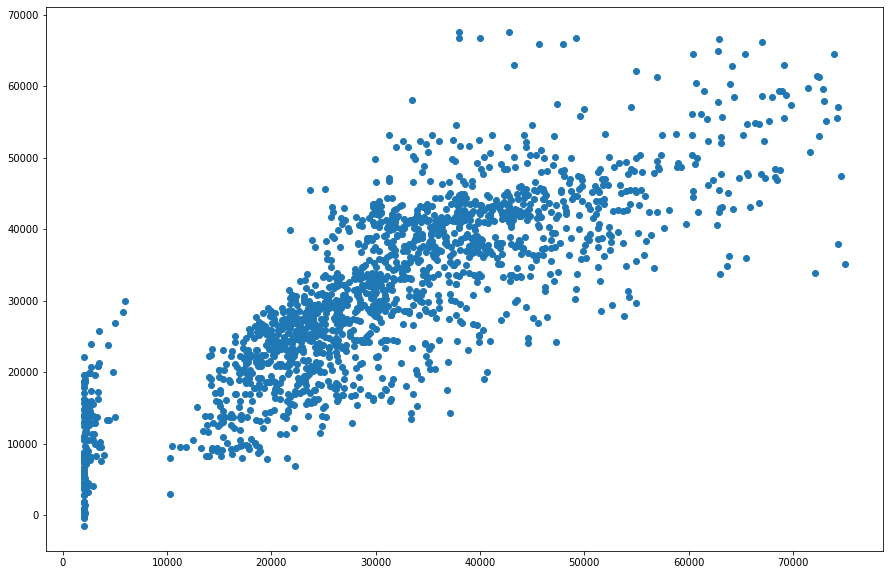

In [42]:
# Predicting the Test result

plt.figure(figsize=(15,10))
Y_pred = reg.predict(X_test)
plt.scatter(Y_test,Y_pred)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

print('MAE:%.2f' % mean_absolute_error(Y_test,Y_pred))  
print('RMSE:%.2f' % np.sqrt(mean_squared_error(Y_test,Y_pred)))
print('R2 Score:%.2f' % r2_score(Y_test,Y_pred))

MAE:6445.60
RMSE:8446.83
R2 Score:0.68
